In [224]:
import pandas as pd, numpy as np, json, os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.style.available

In [225]:
m=json.loads(open('ignore/member_timelines.json','r').read())
members=json.loads(open('ignore/member_simple.json','r').read())

In [226]:
m[10]

{'start': '1992-10-28 00:00:00',
 'end': '1996-11-22 00:00:00',
 'Name': 'ANTAL István',
 'duration': '1486',
 'Simple': 'Antal Istvan | 1948-06-23',
 'Csoportok': '⏫ Gazdaság, ipar',
 'Csoportok0': '⏫ Gazdaság, ipar    ',
 'Csoportok1': '⏫ Gazdaság, ipar',
 'Típus': 'Bizottság'}

In [248]:
d=pd.DataFrame(members['deaths'],index=['v']).T

In [249]:
d['v']=' †'

In [229]:
s=pd.DataFrame(members['s2'],index=['s']).T

In [230]:
s.head()

,s
Mocioi Ion | 1940-10-03,Ion MOCIOI
Antal Istvan | 1948-06-23,ANTAL István
Giurgiu Mircia | 1964-12-16,Mircia GIURGIU
Andronescu Ecaterina | 1948-04-07,Ecaterina ANDRONESCU
Chircu Doinita-Mariana | 1960-08-13,Doiniţa-Mariana CHIRCU


In [231]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        if i['Csoportok'] not in data[i['Típus']]:data[i['Típus']][i['Csoportok']]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][i['Csoportok']]:data[i['Típus']][i['Csoportok']][st]=set()
            data[i['Típus']][i['Csoportok']][st].add(name)            
            if name not in attention:attention[name]={}
            if st not in attention[name]:attention[name][st]=0
            attention[name][st]+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


In [232]:
df=pd.DataFrame(attention)

In [233]:
pd.to_datetime('2019-07-01')-pd.to_datetime('2018-01-24')

Timedelta('523 days 00:00:00')

In [234]:
counts=df.count().sort_values(ascending=False)

In [235]:
counts.head(7)

Marton Arpad-Francisc | 1955-03-25             10553
Verestoy Attila | 1954-03-01                   10553
Dumitrescu Cristian-Sorin | 1955-04-24          9702
Seres Denes | 1953-07-21                        9702
Nicolicea Eugen | 1956-06-06                    9702
Niculescu Duvaz Bogdan Nicolae | 1948-12-14     9631
Marko Bela | 1951-09-08                         9631
dtype: int64

In [256]:
switches={}
fusions={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Megye','Párt']:
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if name not in switches:switches[name]={}
            if i['Típus']not in switches[name]:switches[name][i['Típus']]={'count':0,'current':i['Csoportok']}
            if switches[name][i['Típus']]['current']!=i['Csoportok']:
                p1=i['Csoportok']
                p2=switches[name][i['Típus']]['current']
                if i['Típus'] not in fusions:fusions[i['Típus']]={}
                if p1 not in fusions[i['Típus']]:fusions[i['Típus']][p1]={}
                if p2 not in fusions[i['Típus']][p1]:fusions[i['Típus']][p1][p2]=0
                fusions[i['Típus']][p1][p2]+=1
                switches[name][i['Típus']]['current']=str(i['Csoportok'])
                switches[name][i['Típus']]['count']+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


In [250]:
def get_sub(x):
    df=pd.DataFrame({i:{j:switches[i][j]['count'] for j in switches[i]} for i in switches})
    part=df.T[x].sort_values(ascending=False)
    print(part.mean())
    print(part.head(5))
    df=pd.DataFrame(part).join(pd.DataFrame(counts)).join(s).join(d)
    df['v']=df['v'].fillna('')
    df['s']=df['s']+df['v']
    df=df.set_index('s')
    df['a']=df[x]/(df[0]/365)
    df=df.replace([np.inf, -np.inf], np.nan)
    part=df.sort_values(by='a',ascending=False)['a']
    return part

In [251]:
part=get_sub('Párt')
megye=get_sub('Megye')

0.5214207250091542
Timis Ioan | 1951-09-17                 6
Ion Vasile | 1950-01-12                 5
Gradinaru Nicolae | 1953-11-05          5
Iliescu Valentin Adrian | 1961-11-01    5
Codirla Liviu | 1968-01-25              5
Name: Párt, dtype: int64
0.06847308678139875
Mihalcescu Carmen-Ileana | 1970-05-14          3
Niculescu Duvaz Bogdan Nicolae | 1948-12-14    3
Nicolaescu Sergiu-Florin | 1930-04-13          3
Banicioiu Nicolae | 1979-03-26                 3
Nicolae Serban | 1968-04-05                    2
Name: Megye, dtype: int64


0.08647887115397357
0.0066872897002045436


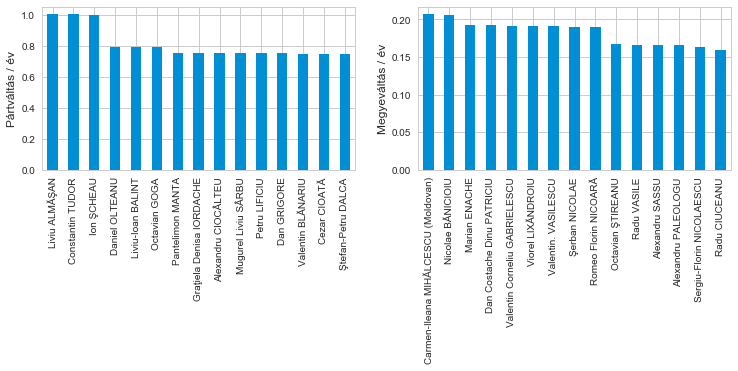

In [252]:
top=15
fig,axes=plt.subplots(1,2,figsize=(11,3))
ax=axes[0]
print(part.mean())
ax=part.head(top).plot(kind='bar',ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Pártváltás / év")
print(megye.mean())
ax=axes[1]
megye.head(top).plot(kind='bar',ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Megyeváltás / év")
plt.savefig('fig/valtas.png',bbox_inches='tight',transparent=True)
plt.show()

Fusions

In [265]:
fusions['part']=fusions['Párt']
fusions.pop('Párt');
open('json/fusions.json','w').write(json.dumps(fusions))

13722

In [279]:
switches={}
fusions2={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Párt']:
        if not ((i['Típus']=='Párt')and(i['Csoportok']=='👤 Independent - Independent')):        
            for t in pd.date_range(i['start'],i['end']):
                st=str(t)[:10]
                if name not in switches:switches[name]={}
                if i['Típus']not in switches[name]:switches[name][i['Típus']]={'count':0,'current':i['Csoportok']}
                if switches[name][i['Típus']]['current']!=i['Csoportok']:
                    p1=i['Csoportok']
                    p2=switches[name][i['Típus']]['current']
                    if i['Típus'] not in fusions2:fusions2[i['Típus']]={}
                    if p1 not in fusions2[i['Típus']]:fusions2[i['Típus']][p1]={}
                    if p2 not in fusions2[i['Típus']][p1]:fusions2[i['Típus']][p1][p2]=0
                    fusions2[i['Típus']][p1][p2]+=1
                    switches[name][i['Típus']]['current']=str(i['Csoportok'])
                    switches[name][i['Típus']]['count']+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


In [280]:
fusions2['part']=fusions2['Párt']
fusions2.pop('Párt');
open('json/fusions2.json','w').write(json.dumps(fusions2))

6307

In [ ]:
edges={}
points={'Ország':3,'Bizottság':4,'Párt':2,'Megye':1}
for tipus in data:
    for csoport in data[tipus]:
        print(csoport)
        for t in data[tipus][csoport]:
            names=list(data[tipus][csoport][t])
            for r in range(len(names)):
                name=names[r]
                for p in range(r+1,len(names)):
                    name2=names[p]
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]
                    if nset not in edges:edges[nset]={'anneal':0,'values':0}
                    edges[nset]['values']+=v
                    edges[nset]['anneal']+=v*tanneal[t]

Save

In [ ]:
import pickle

In [ ]:
def save_obj(obj, name ):
    with open('ignore/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('ignore/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
save_obj(edges,'plotter_name_edges')

In [82]:
edges=load_obj('plotter_name_edges')

Prune

In [ ]:
df=pd.DataFrame(edges).T

In [ ]:
all_nodes=set(df.reset_index()['level_0']).union(df.reset_index()['level_1'])

In [ ]:
min_baratsag=500
df2=df[df['anneal']>min_baratsag]

In [ ]:
df2['regi']=df2['anneal']/df2['values']

In [ ]:
df2=df2['anneal'].reset_index()

In [ ]:
df2.columns=['source','target','weight']

In [ ]:
nodes={}
for i in all_nodes:
    if i not in nodes:
        nodes[i]={'pr':0,'bc':0,'cf':0}

In [ ]:
G=nx.Graph(df2)

In [ ]:
r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['pr']=r[i]/mr

In [ ]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
r = nx.current_flow_closeness_centrality(Gc,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['cf']=r[i]/mr

In [ ]:
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z
    links[name2][name]=z

In [ ]:
#save 
network={'nodes':nodes,'links':links}
print(len(nodes),'nodes and',len(G.edges()),'edges')

In [ ]:
open('ignore/plotter_name.json','w').write(json.dumps(network))

In [ ]:
import zipfile

with zipfile.ZipFile("json/plotter_name.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name.json",'plotter_name.json')